#### 연관분석
- 참조: 연관분석_파이썬.pdf 파일 참조

In [1]:
# mlxtend 모듈을 이용해 분석
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder # 연관 규칙 분석하는 함수
from mlxtend.frequent_patterns import apriori

- 상품의 구입여부 확인

In [2]:
# 데이터셋 구성
data=[['사과','치즈','생수',],
      ['생수','호두','치즈','고등어'],
      ['수박','사과','생수',],
      ['생수','호두','치즈','옥수수']]

# TranscationEncoder를 이용해 데이터 나타났는지 출연 여부를 확인합니다.
tren=TransactionEncoder() # 사이키런 같은 하나의 모듈
                          # 객체 생성
tren_ary=tren.fit(data).transform(data)
tren.columns_ # 가나다순으로 고유값을 뽑아준다. -> 전체 톡픽의 고유값을 확인해준다.

['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두']

In [3]:
tren_ary # 문장단위 단어의 포함여부를 True/False로 출력해준다.

array([[False,  True,  True, False, False,  True, False],
       [ True, False,  True, False, False,  True,  True],
       [False,  True,  True,  True, False, False, False],
       [False, False,  True, False,  True,  True,  True]])

In [4]:
# DataFrame 형식으로 출력
df_tren=pd.DataFrame(tren_ary, columns=tren.columns_)
df_tren

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


- 지지도 계산(apriori - 모듈 사용)

In [5]:
tren.columns_

['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두']

In [6]:
fre_items = apriori(df_tren, min_support=0.03, use_colnames=True)
fre_items


,support,itemsets
0,0.25,(고등어)
1,0.50,(사과)
2,1.00,(생수)
3,0.25,(수박)
4,0.25,(옥수수)
5,0.75,(치즈)
6,0.50,(호두)
7,0.25,"(고등어, 생수)"
8,0.25,"(고등어, 치즈)"
9,0.25,"(고등어, 호두)"


#### 람다식(lambda)
- 입력방법: lambda 매개변수 : 표현식
- 대상.apply() 함수와 같이 사용
- map(함수, 리스트): map(lambda x: x**2, range(5))
- 예: items.apply(lambda x: len(x)) 

In [7]:
def ss(a,b):
  return a + b

print(ss(10,20))

print((lambda a,b: a + b)(10,20))
print(list(map(lambda x : x ** 2,range(4)))) # 리스트 형태로 값들이 출력된다.


30
30
[0, 1, 4, 9]


In [8]:
# fre_items에 length 필드 추가
fre_items['length']=fre_items['itemsets'].apply(lambda x: len(x))
display(fre_items.head(3))
display(fre_items.tail(3))

,support,itemsets,length
0,0.25,(고등어),1
1,0.50,(사과),1
2,1.00,(생수),1


,support,itemsets,length
28,0.25,"(호두, 옥수수, 치즈)",3
29,0.25,"(호두, 고등어, 생수, 치즈)",4
30,0.25,"(호두, 생수, 옥수수, 치즈)",4


In [9]:
# 'support'가 0.3 이상이혹 itemset이 2개 이상인 데이터만 추출한다.
fre_items=fre_items[(fre_items['support']>=0.3) & (fre_items['length']>=2)]
fre_items.sort_values('support', ascending=False) # 지지도 기준으로 오름차순 정렬
fre_items

,support,itemsets,length
10,0.50,"(생수, 사과)",2
15,0.75,"(생수, 치즈)",2
16,0.50,"(호두, 생수)",2
19,0.50,"(호두, 치즈)",2
27,0.50,"(호두, 생수, 치즈)",3


In [10]:
# apriori 함수를 이용한 지지도/신뢰도/향상도 확인
from mlxtend.frequent_patterns import association_rules

fre_items=apriori(df_tren, min_support=0.3, use_colnames=True)
fre_items

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(생수, 사과)"
5,0.75,"(생수, 치즈)"
6,0.50,"(호두, 생수)"
7,0.50,"(호두, 치즈)"
8,0.50,"(호두, 생수, 치즈)"


In [11]:
association_rules(fre_items, min_threshold=0.3,metric='lift')
# 결과를 보면 호두와 치즈. 치즈와 호두를 사는 경우가 1 이상이므로 이 두개를 한번에 살 연관성이 있다.
# confidence 값과 lift 값이 1.0, 1.0 이면 서로 연관을 주지 않는 것이다.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
1,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
2,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
3,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
4,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
5,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
6,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
7,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
8,"(호두, 생수)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
9,"(호두, 치즈)",(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf


#### 부산서면맛집 크롤링 결과를 이용한 연관성 분석

In [12]:
# 한글 폰트 설치 및 런타임 재실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [13]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import re   # 정규식 표현법: https://wikidocs.net/4308

In [14]:
# pandas를 이용해 데이터 읽어오기
fdir='/content/drive/MyDrive/Notability/Github/Python_Machine_Learning/etc/'
df=pd.read_csv(fdir+'부산서면맛집.csv')
df.head(3)

,ques_date,title,question,answer
0,2022.01.27,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,내용없음,서면은 워낙 번화가다 보니까 확실히 저도 맛집을 찾는게 어렵긴 하더라구요저...
1,2022.12.26,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,\n부산 서면 보신탕맛집남자친구가 보신탕이 먹고싶다고하네요여자인데도 저또한 먹을줄알...,부산 서면 보신탕맛집답변드릴게요!서면집이라고 하는 영양탕 집이 있는데​부산...
2,2022.03.23,\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t...,\n\t\t\t\t\t\t부산 사는 14살 여학생 입니다.친구랑 서면을 가려고 하는...,안녕하세요:) 플래너 다다입니다.삼보게임랜드 근처 맛집을 찾으시군요~학생이...


- 피클(pickle): 필요한 부분들을 미리 딕셔너리, 리스트, 튜플로 저장을 해놓는 것
  - 저장하는 경우: pickle.dump(객체, 파일)
  - 로딩하는 경우: pickle.load(파일)

In [15]:
import pickle
#f = open(fdir+'nouns_answers.pickle', 'rb') # 'rb' ; byte 형태로 읽기
#data = pickle.load(f)
with open(fdir+'nouns_answers.pickle','rb') as f:
  data=pickle.load(f)

print(data)

[['서면', '번화가', '저', '맛집', '게', '저', '개인', '데이트', '때', '식사', '심플', '맛', '곳', '지금', '가본', '곳', '중', '분위기', '부산', '서면', '맛집', '고흐', '드', '키친', '소개', '메뉴판', '설명', '유럽', '신비', '분위기', '남', '프랑스', '마을', '모티브', '식당', '셰프', '곳', '기억', '고객', '전달', '분위기', '물론', '고급', '느낌', '기념일', '날', '오', '시기', '만', '곳', '수', '메뉴', '음식', '재미', '거', '호', '볼', '호', '맛', '비주얼', '자랑', '음식', '종류', '다양', '하나', '퀄리티', '메뉴', '주문', '실패', '저', '샐러드', '파스타', '스테이크', '리조', '주문', '매력', '음료', '다양', '구비', '원', '스타일', '주문', '식사', '수', '기분', '하몽', '모', '렐라', '샐러드', '수제', '유', '드레싱', '양상추', '생모', '렐라', '가감', '사용', '프레쉬', '수', '꼴뚜기', '튀김', '김부각', '고추기름', '맛', '꼴뚜기', '먹물', '리조', '부산', '서면', '맛', '집', '수', '한국인', '맛', '동시', '해산물', '식감', '매력', '초비', '올리브', '스카', '로마', '식', '파스타', '올리브', '케이퍼', '자극', '맛', '임팩트', '편', '토마토', '페이스트', '때문', '수', '메뉴', '스테이크', '수', '특수', '부위', '토시살', '소이', '소스', '워터', '이징', '치즈', '감자', '궁합', '최고', '육즙', '데', '야채', '풍미', '치즈', '감자', '퐁듀', '느낌', '스테이크', '고급', '데', '수', '메뉴', '수', '식도락', '분', '선호', '만', '부산'

In [16]:
# 연관 분석
tren=TransactionEncoder()
tren_arr=tren.fit(data).transform(data)
tren_df = pd.DataFrame(tren_arr, columns=tren.columns_)
tren_df.head(3)

,ㄱ,ㄴ,ㄹ,ㅁ,ㅅ,ㅈ,園,堂,新,案,...,희망,희망자,희자,히,히노,히어로,힐,힐링,힘,힙
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# 0.0은 다 나오는 것이다.(4000개)
apritem=apriori(tren_df,min_support=0.1,use_colnames=True) 
apritem

,support,itemsets
0,0.156552,(가격)
1,0.158311,(가능)
2,0.122252,(개인)
3,0.177661,(거)
4,0.164468,(거리)
...,...,...
1008,0.108179,"(맛집, 정보, 다양, 등, 여행, 부산, 정리)"
1009,0.103782,"(맛집, 정보, 다양, 등, 제공, 여행, 부산)"
1010,0.100264,"(식사, 맛집, 다양, 등, 제공, 여행, 정보)"
1011,0.106420,"(맛집, 다양, 등, 제공, 여행, 정보, 정리)"


In [18]:
from mlxtend.frequent_patterns import association_rules
asrul_df=association_rules(apritem,metric='lift',min_threshold=1.0)
asrul_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(곳),(가격),0.387863,0.156552,0.102902,0.265306,1.694680,0.042182,1.148026
1,(가격),(곳),0.156552,0.387863,0.102902,0.657303,1.694680,0.042182,1.786236
2,(가격),(맛집),0.156552,0.489006,0.114336,0.730337,1.493513,0.037781,1.894936
3,(맛집),(가격),0.489006,0.156552,0.114336,0.233813,1.493513,0.037781,1.100838
4,(부산),(가격),0.553210,0.156552,0.115215,0.208267,1.330335,0.028609,1.065318
...,...,...,...,...,...,...,...,...,...
13413,(다양),"(곳, 맛집, 정보, 등, 여행, 부산, 정리)",0.215479,0.100264,0.100264,0.465306,4.640816,0.078659,1.682713
13414,(등),"(곳, 맛집, 정보, 다양, 여행, 부산, 정리)",0.259455,0.100264,0.100264,0.386441,3.854237,0.074250,1.466421
13415,(여행),"(곳, 맛집, 정보, 다양, 등, 부산, 정리)",0.278804,0.100264,0.100264,0.359621,3.586751,0.072310,1.405007
13416,(부산),"(곳, 맛집, 정보, 다양, 등, 여행, 정리)",0.553210,0.113456,0.100264,0.181240,1.597441,0.037499,1.082788


In [19]:
asrul_df[asrul_df['lift']>=2]
# 지지도가 높은 경우는 모든 문장에 나타는 것인거고, 중요도가 낮은 경우이다.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(가격),(수),0.156552,0.342128,0.116974,0.747191,2.183949,0.063413,2.602248
7,(수),(가격),0.342128,0.156552,0.116974,0.341902,2.183949,0.063413,1.281645
10,(분),(가능),0.202287,0.158311,0.113456,0.560870,3.542826,0.081432,1.916717
11,(가능),(분),0.158311,0.202287,0.113456,0.716667,3.542826,0.081432,2.815459
12,(가능),(수),0.158311,0.342128,0.121372,0.766667,2.240874,0.067209,2.819450
...,...,...,...,...,...,...,...,...,...
13412,(정보),"(곳, 맛집, 다양, 등, 여행, 부산, 정리)",0.193492,0.101143,0.100264,0.518182,5.123241,0.080693,1.865552
13413,(다양),"(곳, 맛집, 정보, 등, 여행, 부산, 정리)",0.215479,0.100264,0.100264,0.465306,4.640816,0.078659,1.682713
13414,(등),"(곳, 맛집, 정보, 다양, 여행, 부산, 정리)",0.259455,0.100264,0.100264,0.386441,3.854237,0.074250,1.466421
13415,(여행),"(곳, 맛집, 정보, 다양, 등, 부산, 정리)",0.278804,0.100264,0.100264,0.359621,3.586751,0.072310,1.405007


- 단어들에 대한 가시화

In [20]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import networkx as nx
from apyori import apriori
import matplotlib.pyplot as plt

In [22]:
support_res=(apriori(data, min_support=0.1))
df_sup=pd.DataFrame(support_res)
df_sup

,items,support,ordered_statistics
0,(가격),0.156552,"[((), (가격), 0.1565523306948109, 1.0)]"
1,(가능),0.158311,"[((), (가능), 0.158311345646438, 1.0)]"
2,(개인),0.122252,"[((), (개인), 0.12225153913808268, 1.0)]"
3,(거),0.177661,"[((), (거), 0.17766051011433598, 1.0)]"
4,(거리),0.164468,"[((), (거리), 0.1644678979771328, 1.0)]"
...,...,...,...
1008,"(맛집, 정보, 다양, 등, 여행, 부산, 정리)",0.108179,"[((), (다양, 등, 여행, 정보, 부산, 맛집, 정리), 0.108179419..."
1009,"(맛집, 정보, 다양, 등, 제공, 여행, 부산)",0.103782,"[((), (다양, 등, 제공, 여행, 정보, 부산, 맛집), 0.103781882..."
1010,"(식사, 맛집, 다양, 등, 제공, 여행, 정보)",0.100264,"[((), (다양, 등, 식사, 제공, 여행, 정보, 맛집), 0.100263852..."
1011,"(맛집, 다양, 등, 제공, 여행, 정보, 정리)",0.106420,"[((), (다양, 등, 제공, 여행, 정보, 맛집, 정리), 0.106420404..."


In [23]:
df_sup['length'] = df_sup['items'].apply(lambda x: len(x))
df_sup

,items,support,ordered_statistics,length
0,(가격),0.156552,"[((), (가격), 0.1565523306948109, 1.0)]",1
1,(가능),0.158311,"[((), (가능), 0.158311345646438, 1.0)]",1
2,(개인),0.122252,"[((), (개인), 0.12225153913808268, 1.0)]",1
3,(거),0.177661,"[((), (거), 0.17766051011433598, 1.0)]",1
4,(거리),0.164468,"[((), (거리), 0.1644678979771328, 1.0)]",1
...,...,...,...,...
1008,"(맛집, 정보, 다양, 등, 여행, 부산, 정리)",0.108179,"[((), (다양, 등, 여행, 정보, 부산, 맛집, 정리), 0.108179419...",7
1009,"(맛집, 정보, 다양, 등, 제공, 여행, 부산)",0.103782,"[((), (다양, 등, 제공, 여행, 정보, 부산, 맛집), 0.103781882...",7
1010,"(식사, 맛집, 다양, 등, 제공, 여행, 정보)",0.100264,"[((), (다양, 등, 식사, 제공, 여행, 정보, 맛집), 0.100263852...",7
1011,"(맛집, 다양, 등, 제공, 여행, 정보, 정리)",0.106420,"[((), (다양, 등, 제공, 여행, 정보, 맛집, 정리), 0.106420404...",7


In [30]:
# 2개의 값들로 되어있는 것만 들고오겠다. & 0.1 이상인 경우. support기준으로 정렬(오름차순)
df_nx=df_sup[(df_sup['length'] == 2) & df_sup['support']>=0.1].sort_values('support',ascending=False)
df_nx

,items,support,ordered_statistics,length
210,"(부산, 맛집)",0.373791,"[((), (부산, 맛집), 0.3737906772207564, 1.0), ((맛집...",2
119,"(곳, 부산)",0.291117,"[((), (곳, 부산), 0.2911169744942832, 1.0), ((곳),...",2
266,"(추천, 부산)",0.281442,"[((), (추천, 부산), 0.28144239226033424, 1.0), ((부...",2
117,"(곳, 맛집)",0.262093,"[((), (곳, 맛집), 0.2620932277924362, 1.0), ((곳),...",2
253,"(여행, 부산)",0.247142,"[((), (여행, 부산), 0.24714160070360597, 1.0), ((부...",2
...,...,...,...,...
168,"(내, 수)",0.100264,"[((), (내, 수), 0.10026385224274406, 1.0), ((내),...",2
113,"(곳, 길)",0.100264,"[((), (곳, 길), 0.10026385224274406, 1.0), ((곳),...",2
187,"(등, 분)",0.100264,"[((), (등, 분), 0.10026385224274406, 1.0), ((등),...",2
196,"(등, 집)",0.100264,"[((), (등, 집), 0.10026385224274406, 1.0), ((등),...",2


In [31]:
# 네트워크 이미지 출력

ng=nx.Graph()
arp=(df_nx['items']) # 반드시 튜플 구조로 만들어야한다.
ng.add_edges_from(arp)

print(arp)
print(ng) # 가지고 있는 데이터 값이 노드 형태로 있어서 이제 네트워크에 뿌려주면 된다.

210    (부산, 맛집)
119     (곳, 부산)
266    (추천, 부산)
117     (곳, 맛집)
253    (여행, 부산)
         ...   
168      (내, 수)
113      (곳, 길)
187      (등, 분)
196      (등, 집)
204     (링크, 수)
Name: items, Length: 264, dtype: object
Graph with 56 nodes and 264 edges


In [32]:
!pip install --upgrade networkx==2.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
# # 노드와 엣지/페이지 랭크
import numpy as np
from operator import pos

# 버젼 확인후 실행(인터넷 검색)
news_nx=nx.pagerank(ng)  # 각 단어의 좌표값 생성
nsize = np.array([v for v in news_nx.values()])
nsize = 2000 * (nsize- min(nsize)) / (max(nsize)-min(nsize)) 


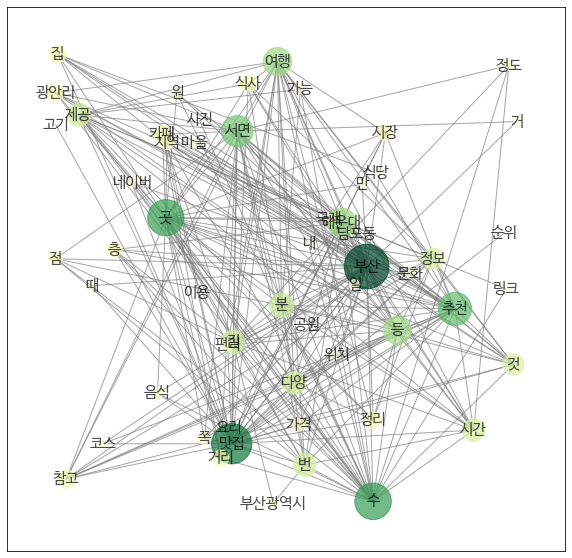

In [53]:
import matplotlib.pyplot as plt

# 레이아웃(다양하게 제공)
pos =nx.random_layout(ng)  

plt.figure(figsize=(10,10))

nx.draw_networkx(ng, font_family ="NanumBarunGothic", font_size = 15,
                 pos=pos,node_color=list(news_nx.values()), node_size=nsize, 
                 alpha=0.7, edge_color='0.5', cmap = plt.cm.YlGn)
